In [2]:
import pandas as pd
import pandas_datareader as web
import pymysql
from sqlalchemy import create_engine

tickers = [
    'SPY',  # 미국 주식
    'IEV',  # 유럽 주식 
    'EWJ',  # 일본 주식
    'EEM',  # 이머징 주식
    'TLT',  # 미국 장기채
    'IEF',  # 미국 중기채
    'IYR',  # 미국 리츠
    'RWX',  # 글로벌 리츠
    'GLD',  # 금
    'DBC'  # 상
]

In [3]:
import pandas_datareader.data as web
import yfinance as yf

yf.pdr_override()

all_data = {}
for ticker in tickers:
    all_data[ticker] = web.get_data_yahoo(ticker, start='1993-01-22')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
prices = pd.DataFrame(
    {tic: data['Adj Close']
     for tic, data in all_data.items()})

In [5]:
prices

,SPY,IEV,EWJ,EEM,TLT,IEF,IYR,RWX,GLD,DBC
Date,,,,,,,,,,
1993-01-29,25.218229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,25.397579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-02,25.451405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-03,25.720434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-04,25.828058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-02-13,412.829987,49.750000,58.090000,40.520000,104.260002,97.190002,92.279999,27.930000,172.479996,24.280001
2023-02-14,412.640015,49.980000,57.799999,40.450001,104.019997,96.750000,91.470001,27.860001,172.610001,24.360001
2023-02-15,413.980011,49.930000,57.230000,40.110001,103.050003,96.459999,91.870003,27.520000,170.889999,24.100000


<Figure size 3600x1440 with 0 Axes>

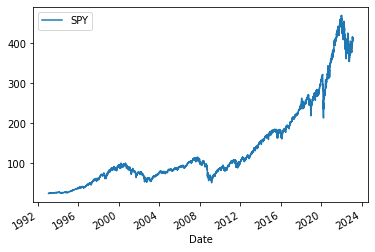

In [14]:
plt.figure(figsize=(50,20))
prices[['SPY']].plot();

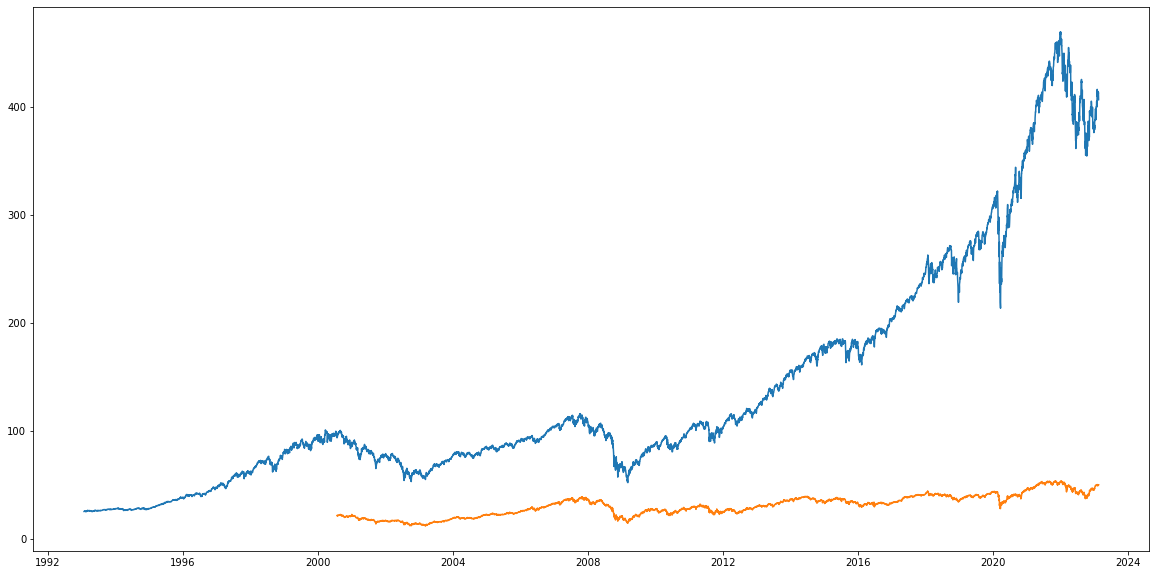

In [21]:
plt.figure(figsize=(20,10))
plt.plot(prices.index,prices['SPY'])
plt.plot(prices.index,prices['IEV'])
plt.show();


In [41]:
rets = prices.pct_change(1).dropna()

rets.tail().round(4)

,SPY,IEV,EWJ,EEM,TLT,IEF,IYR,RWX,GLD,DBC
Date,,,,,,,,,,
2023-02-13,0.0117,0.0122,-0.0005,0.0082,0.0084,0.0024,0.0095,0.0029,-0.0051,-0.0021
2023-02-14,-0.0005,0.0046,-0.0050,-0.0017,-0.0023,-0.0045,-0.0088,-0.0025,0.0008,0.0033
2023-02-15,0.0032,-0.0010,-0.0099,-0.0084,-0.0093,-0.0030,0.0044,-0.0122,-0.0100,-0.0107
2023-02-16,-0.0138,-0.0068,-0.0033,0.0002,-0.0142,-0.0033,-0.0086,0.0022,-0.0008,-0.0029
2023-02-17,-0.0025,0.0063,-0.0004,-0.0110,0.0078,0.0028,-0.0046,0.0004,0.0030,-0.0075


In [62]:
rets=rets[['SPY','IEV','EWJ','EEM']]
rets

,SPY,IEV,EWJ,EEM
Date,,,,
2006-12-20,-0.000562,-0.005810,0.007122,0.011066
2006-12-21,-0.003658,0.000510,0.005714,-0.001790
2006-12-22,-0.006144,-0.006438,0.003551,0.003586
2006-12-26,0.005897,0.000774,-0.000708,0.009290
2006-12-27,0.006569,0.010823,0.004249,0.014249
...,...,...,...,...
2023-02-13,0.011739,0.012207,-0.000516,0.008211
2023-02-14,-0.000460,0.004623,-0.004992,-0.001728
2023-02-15,0.003247,-0.001000,-0.009862,-0.008405


In [43]:
# 포트폴리오 비중 구하기
weights = np.random.random(4) 
weights /= np.sum(weights)        # 총합으로 나누어 난수들 합이 1이 되도록 조정
weights      

array([0.30897906, 0.23507973, 0.34649796, 0.10944325])

In [72]:
rets

,SPY,IEV,EWJ,EEM
Date,,,,
2006-12-20,-0.000562,-0.005810,0.007122,0.011066
2006-12-21,-0.003658,0.000510,0.005714,-0.001790
2006-12-22,-0.006144,-0.006438,0.003551,0.003586
2006-12-26,0.005897,0.000774,-0.000708,0.009290
2006-12-27,0.006569,0.010823,0.004249,0.014249
...,...,...,...,...
2023-02-13,0.011739,0.012207,-0.000516,0.008211
2023-02-14,-0.000460,0.004623,-0.004992,-0.001728
2023-02-15,0.003247,-0.001000,-0.009862,-0.008405


In [66]:
daily_ret = rets.pct_change(1).dropna()        #pct_change() 일간 수익률 구하기
annual_ret = rets.mean() * 252       #일간수익률 평균에 252를 곱해서 연간 수익률 구하기

daily_cov = rets.cov()               #일간 리스크
annual_cov = daily_cov * 252              #연간 리스크

In [71]:
annual_ret

SPY    0.105457
IEV    0.055868
EWJ    0.038362
EEM    0.068087
dtype: float64

In [69]:
port_ret = []       # 포트폴리오 수익률
port_risk = []      # 포트폴리오 리스크
port_weights = []   # 종목 비중
sharpe_ratio = []   # 샤프비율 리스트 설정

for _ in range(20000):                         # 20000개의 포트폴리오 생성
    
    weights = np.random.random(4)    # 4가지 종목 난수생성
    weights /= np.sum(weights)                 # weights의 총합으로 나누어 총합 1이되게 조정
    returns = np.dot(weights, annual_ret)      #각 종목 비중과 수익률을 곱해 해당 포트폴리오의 수익률 계산
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))    #해당 포트폴리오 리스크 계산

    port_ret.append(returns)                    # 각 리스트에 append
    port_risk.append(risk) 
    port_weights.append(weights) 
    sharpe_ratio.append(returns/risk)           # 샤프지수 append

portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe' : sharpe_ratio}     # portfolio 딕셔너리에 각 종목별로 비중값 추가



In [76]:
rets.columns

Index(['SPY', 'IEV', 'EWJ', 'EEM'], dtype='object')

In [80]:
for i, s in enumerate(rets.columns): 
    portfolio[s] = [weight[i] for weight in port_weights] 
    
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk','Sharpe'] + [s for s in rets.columns]] 

In [81]:
df

,Returns,Risk,Sharpe,SPY,IEV,EWJ,EEM
0,0.056535,0.220098,0.256861,0.102026,0.223044,0.425213,0.249717
1,0.064311,0.230317,0.279230,0.162562,0.329490,0.195942,0.312007
2,0.060641,0.232544,0.260772,0.108450,0.153800,0.323609,0.414141
3,0.061592,0.230724,0.266951,0.133618,0.123034,0.335901,0.407447
4,0.052225,0.225413,0.231688,0.026011,0.109055,0.521471,0.343464
...,...,...,...,...,...,...,...
19995,0.089316,0.226072,0.395077,0.598801,0.041758,0.021464,0.337977
19996,0.059835,0.243074,0.246160,0.067971,0.002948,0.361842,0.567239
19997,0.067569,0.215925,0.312928,0.286711,0.230264,0.283217,0.199807
19998,0.072888,0.217771,0.334701,0.360067,0.234670,0.194680,0.210584


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


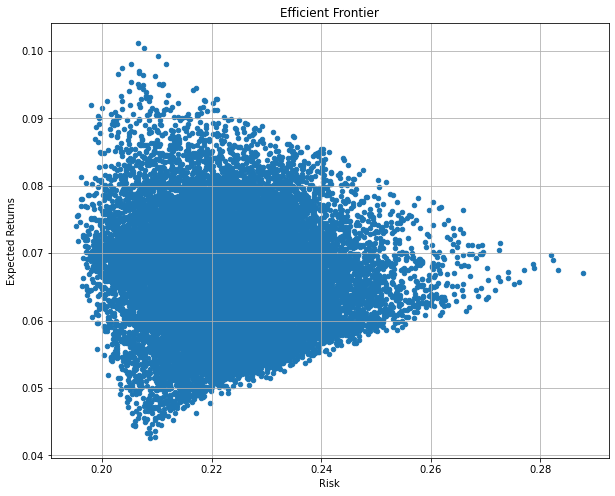

In [82]:
# 효율적 투자선 그리기
df.plot.scatter(x='Risk', y='Returns', figsize=(10, 8), grid=True)
plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 

In [ ]:
import pandas_datareader.data as web
import yfinance as yf

yf.pdr_override()

all_data = {}
for ticker in tickers:
    all_data[ticker] = web.get_data_yahoo(ticker, start='1993-01-22')

In [86]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import random

# 몇 가지 종목 코드(ticker)를 갖고 포트폴리오에 포함된 주식 리스트를 만든다
tickers = [ 'MMM', 'ADBE', 'AMD', 'GOOGL', 'GOOG', 'AMZN' ]

# 수정주가를 담을 빈 데이터프레임을 미리 준비한다
adjClose = pd.DataFrame( )

# for 루프를 만들어 tickers 리스트를 반복하면서 종목 코드를 꺼내고
# DataReader 함수를 사용해 수정주가 데이터를 내려받는다
# 데이터는 야후 파이낸스를 통해 얻는다
for item in tickers:
    adjClose[ item ] = web.get_data_yahoo(item, start='2018-09-15')[ 'Adj Close' ]

# pandas의 pct_change 함수는 데이터의 변화량을 %로 계산한다
# 일간 수정주가 데이터를 일간수익률로 변환해 dailySimpleReturns에 저장한다
dailySimpleReturns = adjClose.pct_change( )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [87]:
adjClose

,MMM,ADBE,AMD,GOOGL,GOOG,AMZN
Date,,,,,,
2018-09-17,178.116043,268.250000,32.430000,57.991501,57.802502,95.401497
2018-09-18,179.816132,270.790009,31.930000,58.355499,58.061001,97.052498
2018-09-19,181.167770,264.880005,31.209999,58.713501,58.554501,96.320999
2018-09-20,182.995422,266.339996,31.180000,59.578499,59.343498,97.214996
2018-09-21,183.896515,260.880005,31.020000,58.605999,58.304501,95.750504
...,...,...,...,...,...,...
2023-02-13,113.773590,375.000000,83.129997,94.610001,95.000000,99.540001
2023-02-14,112.717575,377.899994,85.949997,94.680000,94.949997,99.699997
2023-02-15,113.290001,375.940002,85.180000,96.940002,97.099998,101.160004


In [120]:
dailySimpleReturns

,AAPL,F,AMZN,GE,TSLA
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.015190,-0.025241,0.001242,-0.031472
2019-01-04,0.042689,0.038560,0.050064,0.021092,0.057697
2019-01-07,-0.002226,0.025990,0.034353,0.061968,0.054361
2019-01-08,0.019063,0.009650,0.016612,-0.020595,0.001164
...,...,...,...,...,...
2023-02-13,0.018807,0.028280,0.019773,0.017099,-0.011428
2023-02-14,-0.004225,-0.009167,0.001607,0.010402,0.075062
2023-02-15,0.013903,-0.003084,0.014644,0.014723,0.023847


In [126]:
dailySimpleReturns.sort_values(by='AAPL',ascending=False)

,AAPL,F,AMZN,GE,TSLA
Date,,,,,
2020-03-13,0.119808,0.052336,0.064648,0.085754,-0.024851
2020-07-31,0.104689,-0.019288,0.036961,-0.030351,-0.038138
2020-03-24,0.100325,0.234414,0.019587,0.147300,0.162817
2020-03-02,0.093101,0.034483,0.037266,0.030331,0.113220
2022-11-10,0.088975,0.065364,0.121778,0.026819,0.073934
...,...,...,...,...,...
2020-09-03,-0.080061,-0.018705,-0.046284,-0.018633,-0.090238
2020-03-12,-0.098755,-0.093220,-0.079221,-0.119367,-0.116172
2019-01-03,-0.099607,-0.015190,-0.025241,0.001242,-0.031472


In [90]:
# 기대수익률 대신 일간수익률의 평균을 계산한다
# 계산 결과는 np.matrix( ) 함수를 사용해 행렬로 변환한 후 행렬 연산에 사용한다
meanReturns = np.matrix( dailySimpleReturns.mean( ) )
meanReturns

matrix([[-0.00025215,  0.00055583,  0.00144774,  0.00064996,  0.00065511,
          0.00029415]])

In [92]:
# 주식의 개수만큼 투자 비중을 만든다
numAssets = len( tickers )
numAssets

6

In [94]:
# 투자 비중은 난수로 만들고 투자 비중을 비중의 합으로 나눠 투자 비중의 합이 1.0이 되도록 만든다
weights = np.random.random( numAssets )
weights = weights / sum( weights )

# 투자 비중과 연간 환산수익률을 곱해 포트폴리오 기대수익률을 계산한다
# weights와 meanReturns의 차원은 1x6이다
# 행렬의 곱셈 연산을 위해 meanReturns 행렬을 전치한다(meanReturns.T)
portReturnsExpected = np.sum( weights * meanReturns.T )
portReturnsExpected

0.000639868140524285

In [96]:

# 행렬 연산을 위해 weights를 matrix 데이터형으로 변환한다
weights = np.matrix( weights )

# dailySimpleReturns는 pandas의 DataFrame 객체다. 데이터형을 확인하기 위해 type( ) 함수를 사용했다
print( 'dailySimpleReturns의 데이터형: ', type( dailySimpleReturns ) )


dailySimpleReturns의 데이터형:  <class 'pandas.core.frame.DataFrame'>


In [98]:
# DataFrame 객체는 공분산을 계산해주는 cov 함수를 제공한다
# cov 함수는 DataFrame을 돌려준다. 이번에도 데이터형을 확인하기 위해 type( ) 함수를 사용했다
print( 'dailySimpleReturns.cov( ) 결과의 데이터형: ', type( dailySimpleReturns.cov( ) ) )

# cov( ) 함수로 공분산한 결과는 DataFrame이다. 이 결과는 다시 행렬 연산을 위해 변환할 것이다
# 그러므로 별도의 변수로 저장하지 않고 바로 values 함수를 사용해 행렬로 변환하고 이를 pcov 변수로 저장한다
pcov = dailySimpleReturns.cov( ).values

# 행렬 연산으로 분산을 계산한다. 즉, [비중 * 공분산 행렬 * 비중의 전치행렬]의 연산을 수행해 포트폴리오의 분산을 varp 변수에 저장하고 출력한다
varp = weights*pcov*weights.T
print( '포트폴리오 분산은 ', varp )

dailySimpleReturns.cov( ) 결과의 데이터형:  <class 'pandas.core.frame.DataFrame'>
포트폴리오 분산은  [[0.00041677]]


In [106]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import random

# 몇 가지 종목 코드(ticker)를 갖고 포트폴리오에 포함된 주식 리스트를 만든다
tickers = [ 'AAPL', 'F', 'AMZN', 'GE', 'TSLA' ]

# 수정주가를 담을 빈 데이터프레임을 미리 준비한다
pxclose = pd.DataFrame( )

# for 루프를 만들어 tickers 리스트를 반복하면서 종목 코드를 꺼내고
# DataReader 함수를 사용해 수정주가 데이터를 내려받는다
# 데이터는 야후 파이낸스를 통해 얻는다
for item in tickers:
    pxclose[ item ] = web.get_data_yahoo(item, start='2019-01-01')[ 'Adj Close' ]

# pandas의 pct_change 함수는 데이터의 변화량을 %로 계산한다
# 일간 수정주가 데이터를 일간수익률로 변환해 dailySimpleReturns에 저장한다


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [107]:
ret_daily = pxclose.pct_change( )
ret_daily

,AAPL,F,AMZN,GE,TSLA
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.015190,-0.025241,0.001242,-0.031472
2019-01-04,0.042689,0.038561,0.050064,0.021092,0.057697
2019-01-07,-0.002226,0.025990,0.034353,0.061968,0.054361
2019-01-08,0.019063,0.009650,0.016612,-0.020595,0.001164
...,...,...,...,...,...
2023-02-13,0.018807,0.028280,0.019773,0.017099,-0.011428
2023-02-14,-0.004225,-0.009167,0.001607,0.010402,0.075062
2023-02-15,0.013903,-0.003084,0.014644,0.014723,0.023847


In [109]:
# 종가수익률 평균에 250(1년 중 시장이 열리는 일수)을 곱해 기대수익률을 만든다
ret_annual = ret_daily.mean( ) * 250

# 일간수익률의 공분산을 계산하고 연간 단위로 만든다
cov_daily = ret_daily.cov( )
cov_annual = cov_daily * 250

In [117]:
# 포트폴리오 수익률, 변동성, 투자 비중을 저장할 변수를 미리 준비한다
p_returns = [ ]
p_volatility = [ ]
p_weights = [ ]
 
# len( ) 함수로 투자자산의 수를 계산한다
n_assets = len( tickers )

# 다섯 개 종목으로 투자 비중을 바꿔 3만 개의 포트폴리오를 만들 것이다
n_ports = 30000

# n_ports만큼 반복하면서 자산의 투자 비중을 랜덤하게 만들고 포트폴리오의 기대수익률, 변동성을 계산한다
# 계산한 수익률, 변동성, 투자 비중은 앞서 미리 준비한 변수, p_returns, p_volatility, p_weights에 저장한다
for s in range( n_ports ):

# np.random.random( ) 함수로 난수 생성
  wgt = np.random.random( n_assets )

# 투자 비중 합계 100%를 위해 각 난수를 난수 합으로 나눈다
  wgt /= np.sum( wgt )

# 투자 비중*기대수익률로 기대수익률 계산
  ret = np.dot(   wgt, ret_annual )
    
# 변동성 계산
  vol = np.sqrt( np.dot( wgt.T, np.dot( cov_annual, wgt ) ) )

# 계산한 수익률 추가
  p_returns.append( ret )

# 변동성 추가
  p_volatility.append( vol )

# 투자 비중 추가
  p_weights.append( wgt )

In [118]:


# 완성된 3만 개의 포트폴리오를 차트로 그린다
# np.array로 변환한다
p_volatility = np.array( p_volatility )
p_returns = np.array( p_returns )

# 색상을 n_ports만큼 만든다
colors = np.random.randint( 0, n_ports, n_ports )

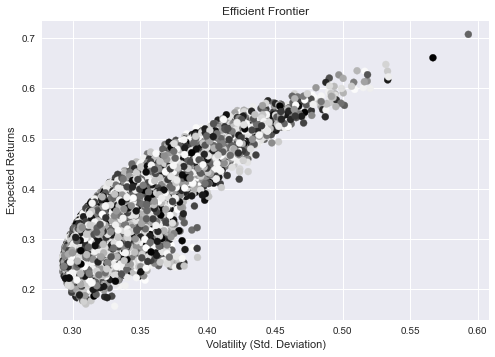

In [119]:
plt.style.use( 'seaborn' )

# 분산 차트 설정
plt.scatter( p_volatility, p_returns, c=colors, marker='o' )

# x축 이름
plt.xlabel( 'Volatility (Std. Deviation)' )

# y축 이름
plt.ylabel( 'Expected Returns' )

# 차트 제목
plt.title( 'Efficient Frontier' )
plt.show( )